# Pyber Homework (Matplotlib)

This is the notebook for the analysis of Pyber information, which consists in about every active driver and historic ride, including details like city, driver count, individual fares, and city type.  I analyzed first the complete information, by city, type, fare, city type and driver count and created a Bubble Plot to see the relation of four variables.  Then I created three pie charts to see by city type the percentages of fare, rides and drivers.

Here we have some observable trends based on the data analyzed:

* The most expensive trips are made in rural cities, because the distances are longer. However, here we have a much smaller amount of trips than those made in urban-type cities.

* Most trips are made in urban type cities, with average rates.  

* Travel in suburban cities has an average rate and the amount is greater than that of rural type cities.  We concentrate the largest number of drivers in urban and suburban areas.

* Travel in suburban areas has a higher rate than in urban areas also because distances are probably greater, and it is likely that drivers are moving between urban and suburban areas.


In [1]:
%matplotlib inline

# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Reading CSV files
f_city_data = pd.read_csv("data/city_data.csv", encoding="ISO-8859-1")
f_ride_data = pd.read_csv("data/ride_data.csv", encoding="ISO-8859-1")

#Merge data in a single data set for use it in the next calculations
city_ride_data = pd.merge(f_ride_data, f_city_data, on=["city", "city"])
city_ride_data = city_ride_data.rename(columns={"type":"city_type"})

# Display the data table for preview
city_ride_data.head()

,city,date,fare,ride_id,driver_count,city_type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

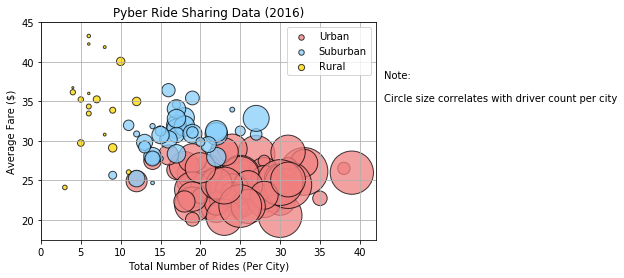

city
Amandaburgh         216
Barajasview         572
Carriemouth        1404
Christopherfurt    1107
Deanville           931
Name: driver_count, dtype: int64

In [5]:
#Filtering information and then grouping it
city_ride_data_u = city_ride_data.loc[(city_ride_data["city_type"] == "Urban"),:]
city_ride_data_s = city_ride_data.loc[(city_ride_data["city_type"] == "Suburban"),:]
city_ride_data_r = city_ride_data.loc[(city_ride_data["city_type"] == "Rural"),:]

group_city_u = city_ride_data_u.groupby(['city'])
group_city_s = city_ride_data_s.groupby(['city'])
group_city_r = city_ride_data_r.groupby(['city'])

#Average fare per city (y axis)
avg_city_u = group_city_u["fare"].mean()
avg_city_s = group_city_s["fare"].mean()
avg_city_r = group_city_r["fare"].mean()

#Total number of rides per city  (x axis)
rides_city_u = group_city_u["ride_id"].count()
rides_city_s = group_city_s["ride_id"].count()
rides_city_r = group_city_r["ride_id"].count()

#Total number of drivers per city (area)
drivers_city_u = group_city_u["driver_count"].sum()
drivers_city_s = group_city_s["driver_count"].sum()
drivers_city_r = group_city_r["driver_count"].sum()



# Build the scatter plots for each city types
color = ['gold', 'lightskyblue', 'lightcoral']
plt.scatter(rides_city_u, avg_city_u, s=drivers_city_u, edgecolors='black', alpha=0.75, label="Urban",linewidths=1, c='lightcoral')
plt.scatter(rides_city_s, avg_city_s, s=drivers_city_s, edgecolors='black', alpha=0.75, label="Suburban", linewidths=1, c='lightskyblue')
plt.scatter(rides_city_r, avg_city_r, s=drivers_city_r, edgecolors='black', alpha=0.75, label="Rural", linewidths=1, c='gold')

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Create a legend
lgnd = plt.legend(numpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.grid(True)

# Incorporate a text label regarding circle size
plt.text(43,38,'Note:')
plt.text(43,35,'Circle size correlates with driver count per city')
plt.ylim(17.5, 45)
plt.xlim(0, 42)

# Save Figure
plt.savefig("Images/PyberBubblePlot.png")

# Show Figure
plt.show()

In [6]:
drivers_city_u.head()

city
Amandaburgh         216
Barajasview         572
Carriemouth        1404
Christopherfurt    1107
Deanville           931
Name: driver_count, dtype: int64

## Total Fares by City Type

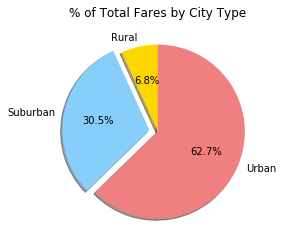

In [12]:
# Calculate Type Percents
#All total
total_fare = city_ride_data["fare"].sum()

#Group by type
group_city_type = city_ride_data.groupby(['city_type'])

fare_type = pd.DataFrame(group_city_type["fare"].sum())
fare_type["Percentage"] = (fare_type["fare"]/total_fare) * 100
fare_type.reset_index(inplace = True)

# Build Pie Chart
explode = (0, 0.1, 0)
plt.title("% of Total Fares by City Type")
plt.pie(fare_type["Percentage"], explode=explode, labels=fare_type["city_type"], colors=color,
        autopct="%1.1f%%", shadow=True, startangle=90)

# Save Figure
plt.savefig("Images/FaresCityType.png")

# Show Figure
plt.show()

## Total Rides by City Type

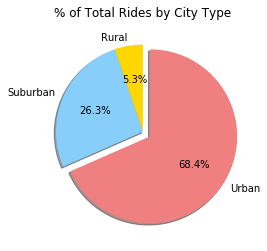

In [13]:
# Calculate Ride Percents
total_rides = city_ride_data["ride_id"].count()

rides_type = pd.DataFrame(group_city_type["ride_id"].count())
rides_type["Percentage"] = (rides_type["ride_id"]/total_rides) * 100
rides_type.reset_index(inplace = True)

# Build Pie Chart
explode = (0, 0, 0.1)
plt.title("% of Total Rides by City Type")
plt.pie(rides_type["Percentage"], explode=explode, labels=fare_type["city_type"], colors=color,
        autopct="%1.1f%%", shadow=True, startangle=90)

# Save Figure
plt.savefig("Images/RidesCityType.png")

# Show Figure
plt.show()

## Total Drivers by City Type

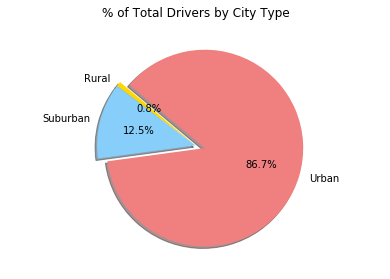

In [14]:
# Calculate Driver Percents
total_drivers = city_ride_data["driver_count"].sum()

drivers_type = pd.DataFrame(group_city_type["driver_count"].sum())
drivers_type["Percentage"] = (drivers_type["driver_count"]/total_drivers) * 100
drivers_type.reset_index(inplace = True)
drivers_type

# Build Pie Charts
explode = (0, 0, 0.1)
plt.axis('equal') 
plt.tight_layout()
plt.title("% of Total Drivers by City Type")
plt.pie(drivers_type["Percentage"], explode=explode, labels=fare_type["city_type"], colors=color,
        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("Images/PieDriversCityType.png")

# Show Figure
plt.show()